In [1]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from library.sb_utils import save_file

In [2]:
#import supplied csv datafile
ski_data = pd.read_csv('../raw_data/ski_resort_data.csv')

In [3]:
#df.info() for a summary of the data
ski_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               330 non-null    object 
 1   Region             330 non-null    object 
 2   state              330 non-null    object 
 3   summit_elev        330 non-null    int64  
 4   vertical_drop      330 non-null    int64  
 5   base_elev          330 non-null    int64  
 6   trams              330 non-null    int64  
 7   fastEight          164 non-null    float64
 8   fastSixes          330 non-null    int64  
 9   fastQuads          330 non-null    int64  
 10  quad               330 non-null    int64  
 11  triple             330 non-null    int64  
 12  double             330 non-null    int64  
 13  surface            330 non-null    int64  
 14  total_chairs       330 non-null    int64  
 15  Runs               326 non-null    float64
 16  TerrainParks       279 non

In [4]:
# use df.head() to print first few rows of database
ski_data.head(10)

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,2,...,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,0,...,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,0,...,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,0,...,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,NaN,0,1,...,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0
5,Yosemite Ski & Snowboard Area,Northern California,California,7800,600,7200,0,0.0,0,0,...,0.4,88.0,NaN,110.0,84.0,300.0,47.0,47.0,107.0,NaN
6,Bear Mountain,Sierra Nevada,California,8805,1665,7140,0,0.0,0,2,...,1.5,198.0,198.0,122.0,76.0,100.0,NaN,NaN,130.0,NaN
7,Bear Valley,Sierra Nevada,California,8500,1900,6600,0,0.0,1,1,...,1.2,1680.0,100.0,165.0,52.0,359.0,NaN,NaN,151.0,NaN
8,Boreal Mountain Resort,Sierra Nevada,California,7700,500,7200,0,0.0,0,1,...,1.0,380.0,200.0,150.0,54.0,400.0,49.0,NaN,150.0,200.0
9,Dodge Ridge,Sierra Nevada,California,8200,1600,6600,0,0.0,0,0,...,2.0,862.0,NaN,NaN,69.0,350.0,78.0,78.0,140.0,NaN


In [5]:
#review only Big Mountain Resort data and use .T property to better view data
ski_data[ski_data['Name'] =='Big Mountain Resort'].T

,151
Name,Big Mountain Resort
Region,Montana
state,Montana
summit_elev,6817
vertical_drop,2353
base_elev,4464
trams,0
fastEight,0.0
fastSixes,0
fastQuads,3


In [6]:
#Count (using `.sum()`) the number of missing values (`.isnull()`) in each column of 
#ski_data as well as the percentages (using `.mean()` instead of `.sum()`).
#Order them (increasing or decreasing) using sort_values
#Call `pd.concat` to present these in a single table (DataFrame) with the helpful column names 'count' and '%'

missing = pd.concat([ski_data.isnull().sum(), 100*ski_data.isnull().mean()], axis = 1)
missing.columns=['count','%']
missing.sort_values(by=['count','%'],ascending = False)

,count,%
fastEight,166,50.303030
NightSkiing_ac,143,43.333333
AdultWeekday,54,16.363636
TerrainParks,51,15.454545
daysOpenLastYear,51,15.454545
AdultWeekend,51,15.454545
projectedDaysOpen,47,14.242424
Snow Making_ac,46,13.939394
averageSnowfall,14,4.242424
LongestRun_mi,5,1.515152


In [7]:
# use select_dtype() to select columns of dtype "object"
ski_data.select_dtypes(include = 'object')

,Name,Region,state
0,Alyeska Resort,Alaska,Alaska
1,Eaglecrest Ski Area,Alaska,Alaska
2,Hilltop Ski Area,Alaska,Alaska
3,Arizona Snowbowl,Arizona,Arizona
4,Sunrise Park Resort,Arizona,Arizona
...,...,...,...
325,Meadowlark Ski Lodge,Wyoming,Wyoming
326,Sleeping Giant Ski Resort,Wyoming,Wyoming
327,Snow King Resort,Wyoming,Wyoming
328,Snowy Range Ski & Recreation Area,Wyoming,Wyoming


In [8]:
#Find duplicated resort names
ski_data['Name'].value_counts().head()

Crystal Mountain               2
Sapphire Valley                1
Big Snow Resort - Blackjack    1
Mount La Crosse                1
Mulligan's Hollow Ski Bowl     1
Name: Name, dtype: int64

In [9]:
#Is Crystal Mountain a duplicate across Region and State or are they 2 resorts with the same name?
(ski_data['Name']+ ',' + ski_data['Region']).value_counts().head()

Bristol Mountain,New York                1
Mt. Holiday Ski Area,Michigan            1
Beaver Mountain,Utah                     1
Blandford Ski Area,Massachusetts         1
Deer Mountain Ski Resort,South Dakota    1
dtype: int64

In [10]:
(ski_data['Name'] + ',' + ski_data['state']).value_counts().head()

Bristol Mountain,New York          1
Snow Valley,California             1
Smugglers' Notch Resort,Vermont    1
Treetops Resort,Michigan           1
Red River,New Mexico               1
dtype: int64

In [11]:
ski_data[ski_data['Name']=='Crystal Mountain']

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
104,Crystal Mountain,Michigan,Michigan,1132,375,757,0,0.0,0,1,...,0.3,102.0,96.0,120.0,63.0,132.0,54.0,64.0,135.0,56.0
295,Crystal Mountain,Washington,Washington,7012,3100,4400,1,NaN,2,2,...,2.5,2600.0,10.0,NaN,57.0,486.0,99.0,99.0,NaN,NaN


In [12]:
#does Region always = state
(ski_data.Region != ski_data.state).value_counts()

False    297
True      33
dtype: int64

In [13]:
ski_data['Region'].value_counts()

New York               33
Michigan               29
Sierra Nevada          22
Colorado               22
Pennsylvania           19
Wisconsin              16
New Hampshire          16
Vermont                15
Minnesota              14
Idaho                  12
Montana                12
Massachusetts          11
Washington             10
Maine                   9
New Mexico              9
Wyoming                 8
Utah                    7
Oregon                  6
Salt Lake City          6
North Carolina          6
Connecticut             5
Ohio                    5
West Virginia           4
Mt. Hood                4
Virginia                4
Illinois                4
Iowa                    3
Alaska                  3
Nevada                  2
South Dakota            2
Arizona                 2
Indiana                 2
Missouri                2
New Jersey              2
Northern California     1
Rhode Island            1
Tennessee               1
Maryland                1
Name: Region

In [17]:
#filter for rows where Region != State
(ski_data[ski_data.Region != ski_data.state].groupby(by=['state'])['Region'].value_counts())

state       Region             
California  Sierra Nevada          20
            Northern California     1
Nevada      Sierra Nevada           2
Oregon      Mt. Hood                4
Utah        Salt Lake City          6
Name: Region, dtype: int64

In [18]:
#calculate the number unique values in 'Region' and 'state'
ski_data[['Region','state']].nunique()

Region    38
state     35
dtype: int64

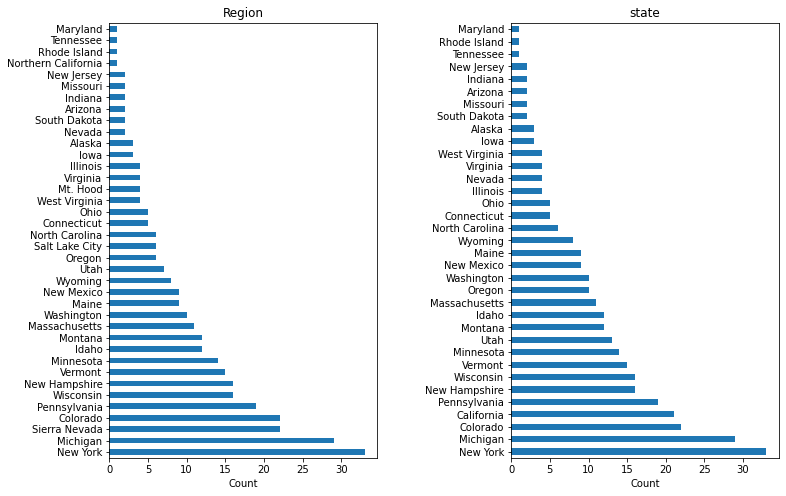

In [21]:
#visualization of resorts by Region and state
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(12,8))

ski_data.Region.value_counts().plot(kind='barh', ax=ax[0])
ax[0].set_title('Region')
ax[0].set_xlabel('Count')

ski_data.state.value_counts().plot(kind="barh", ax=ax[1])
ax[1].set_title('state')
ax[1].set_xlabel('Count')

plt.subplots_adjust(wspace=0.5)

In [22]:
#Distribution of Ticket Price by state
#Average weekend and weekday price by state
state_price_means = ski_data.groupby(by='state')[['AdultWeekday','AdultWeekend']].mean()
state_price_means.head()


,AdultWeekday,AdultWeekend
state,,
Alaska,47.333333,57.333333
Arizona,81.500000,83.500000
California,78.214286,81.416667
Colorado,90.714286,90.714286
Connecticut,47.800000,56.800000


Text(0.5, 0, 'Price($)')

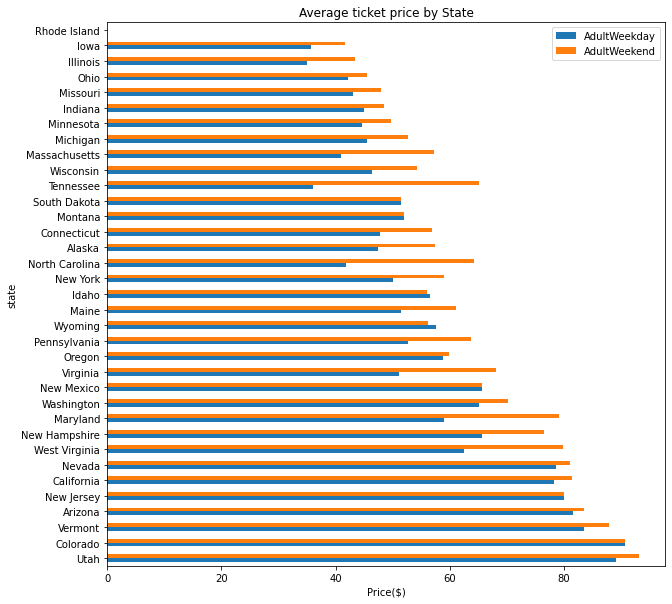

In [25]:
#reorder index and plot prices by state
(state_price_means.reindex(index=state_price_means.mean(axis=1).sort_values(ascending=False).index)
 .plot(kind='barh', figsize =(10,10), title ='Average ticket price by State'))
plt.xlabel('Price($)')

In [28]:
#Distribution of prices by state using pd.melt() for 'state', 'AdultWeekday' and 'AdultWeekend'
ticket_prices = pd.melt(ski_data[['state', 'AdultWeekday', 'AdultWeekend']], id_vars='state', var_name='Ticket', 
                        value_vars=['AdultWeekday' , 'AdultWeekend'],value_name='Price')
ticket_prices.head()

,state,Ticket,Price
0,Alaska,AdultWeekday,65.0
1,Alaska,AdultWeekday,47.0
2,Alaska,AdultWeekday,30.0
3,Arizona,AdultWeekday,89.0
4,Arizona,AdultWeekday,74.0


Text(0.5, 0, 'State')

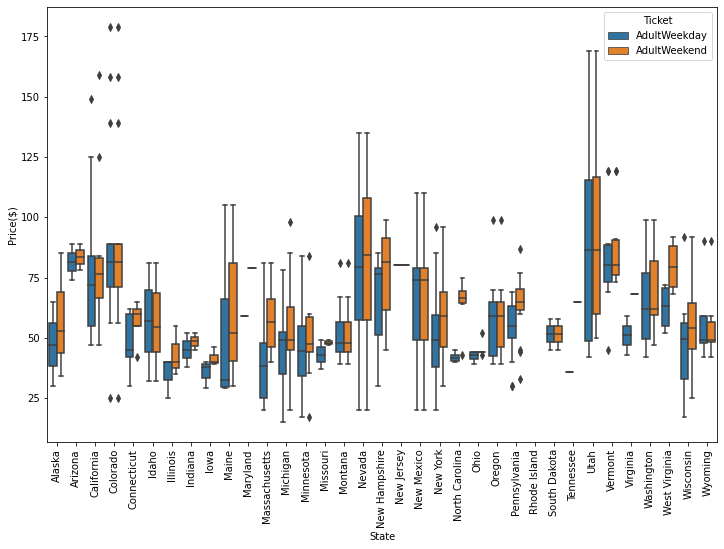

In [29]:
#create boxplot of ticket_prices
plt.subplots(figsize=(12,8))
sns.boxplot(x='state', y='Price', hue= 'Ticket', data=ticket_prices)
plt.xticks(rotation='vertical')
plt.ylabel('Price($)')
plt.xlabel('State')